In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv("G:/tmain.csv")
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

print(data.columns)
print(data.shape)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(500, 8)


In [5]:
data.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
print(data.pickup_latitude.head(5))
print(data.dropoff_latitude.head(5))

0    40.721319
1    40.711303
2    40.761270
3    40.733143
4    40.768008
Name: pickup_latitude, dtype: float64
0    40.712278
1    40.782004
2    40.750562
3    40.758092
4    40.783762
Name: dropoff_latitude, dtype: float64


In [7]:

data['passenger_count'][data.passenger_count==0].count()

1

In [8]:

data.drop(data[data.passenger_count==0].index,axis=0,inplace=True)
print(data.shape)

(499, 8)


In [9]:

data.drop(data[data.passenger_count>8].index,axis=0,inplace=True)
print(data.shape)

(499, 8)


In [10]:

data.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'], infer_datetime_format=True)
data['pickup_datetime'].head(1)

0   2009-06-15 17:26:21
Name: pickup_datetime, dtype: datetime64[ns]

In [12]:
data['year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['dates'] = data['pickup_datetime'].dt.day
data['Week'] = data['pickup_datetime'].dt.dayofweek

In [13]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,dates,Week
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1
5,50:45.0,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3
6,35:00.0,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1
7,22:00.0,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2
8,10:00.0,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0
9,11:00.0,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2


In [14]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [15]:
data['distance']=data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [16]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,dates,Week,distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,1.999157
5,50:45.0,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,3.787239
6,35:00.0,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1,1.555807
7,22:00.0,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2,4.155444
8,10:00.0,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0,1.253232
9,11:00.0,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,2.849627


In [17]:
print(data.shape)
data.drop(data[data.distance==0].index,axis=0, inplace=True)

(499, 13)


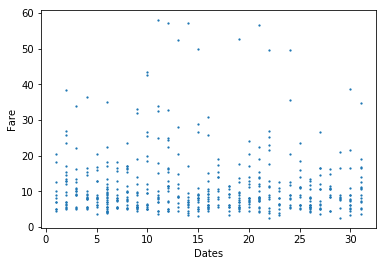

In [18]:
plt.scatter(x=data['dates'], y=data['fare_amount'], s=1.5)
plt.xlabel('Dates')
plt.ylabel('Fare')

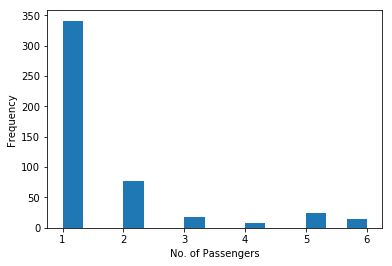

In [19]:
plt.hist(data['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

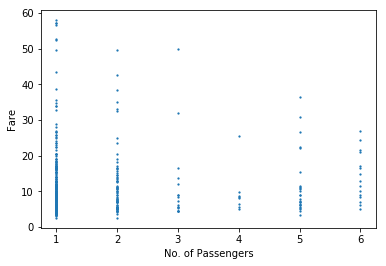

In [20]:
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

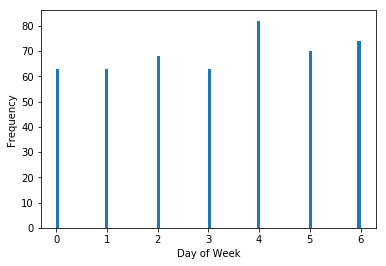

In [21]:
plt.hist(data['Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

In [22]:
print(data.shape)


(483, 13)


In [23]:
data.iloc[:,:].head(1)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,dates,Week,distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.84161,40.712278,1,2009,6,15,0,1.030764


In [25]:
X=data.iloc[:,3:]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,dates,Week,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,1.999157
5,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,3.787239
6,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1,1.555807
7,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2,4.155444
8,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0,1.253232
9,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,2.849627


In [28]:
y=data.iloc[:,1]

In [29]:
y

0       4.50
1      16.90
2       5.70
3       7.70
4       5.30
5      12.10
6       7.50
7      16.50
8       9.00
9       8.90
10      5.30
12      4.10
13      7.00
14      7.70
16     12.50
17      5.30
18      5.30
19      4.00
20     10.50
21     11.50
22      4.50
23      4.90
24      6.10
25      7.30
27      4.50
28      9.30
29      4.50
30      5.50
31     22.54
32     31.90
       ...  
469     8.10
470     9.50
471    23.50
472     2.50
473    11.00
474     6.10
475    28.00
476    10.00
477    10.10
478     7.70
479     8.00
480     6.10
481    20.50
482     9.50
483     7.00
484     8.50
485     7.50
486    11.50
487     7.70
488     6.10
489    38.50
490    11.50
491     6.00
492    17.00
493     7.50
494     5.50
495     6.90
496     3.00
497    12.50
499    38.80
Name: fare_amount, Length: 483, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)


In [31]:
from sklearn.ensemble  import RandomForestRegressor
Regression =RandomForestRegressor(random_state=0)
Regression.fit(train_X,train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
y_pred=Regression.predict(val_X)
y_pred

array([  6.44 ,   8.73 ,  15.71 ,   9.93 ,   6.88 ,  57.224,  11.267,
         8.86 ,   5.02 ,   6.44 ,   9.   ,   7.82 ,  26.183,  13.41 ,
         4.68 ,  56.959,  12.35 ,  11.14 ,   8.42 ,  13.14 ,   7.58 ,
        15.97 ,   5.12 ,   6.45 ,   8.48 ,   4.61 ,  19.54 ,   5.67 ,
        12.36 ,   5.39 ,   5.23 ,  11.15 ,  12.34 ,  19.084,  11.65 ,
        19.68 ,   4.48 ,   9.1  ,  27.811,  10.35 ,   6.92 ,   6.4  ,
        32.136,  53.376,  16.47 ,  23.843,  13.8  ,   8.46 ,  16.03 ,
        29.064,   7.03 ,   4.5  ,  29.511,   4.89 ,  19.3  ,   5.75 ,
         6.95 ,  11.35 ,  20.1  ,  11.84 ,   6.7  ,  26.96 ,  23.59 ,
         3.49 ,  12.24 ,   8.71 ,   5.76 ,   9.91 ,   8.4  ,   5.31 ,
        13.7  ,   6.66 ,  11.74 ,   6.87 ,  15.98 ,  10.9  ,   8.68 ,
         5.61 ,   5.29 ,  10.9  ,   5.44 ,  16.89 ,   8.72 ,   7.19 ,
         6.17 ,   7.74 ,   9.66 ,   7.14 ,  10.66 ,   5.63 ,   6.08 ,
         8.38 ,   8.82 ,   9.5  ,  17.11 ,   8.62 ,  14.46 ])

In [33]:
from sklearn.metrics import r2_score
r2_score(val_y,y_pred)


0.84233253003355713